In [1]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings   
warnings.filterwarnings("ignore")

In [2]:
# Reading data
train = pd.read_csv("train_MpHjUjU.csv")
test = pd.read_csv("test_hXY9mYw.csv")


In [3]:
train.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1


In [4]:
test.head()

,Emp_ID
0,394
1,173
2,1090
3,840
4,308


In [5]:
# Checking for missing values
train.isnull().sum()


MMM-YY                      0
Emp_ID                      0
Age                         0
Gender                      0
City                        0
Education_Level             0
Salary                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Designation                 0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [6]:
# Typecasting variables
train.dtypes

MMM-YY                  object
Emp_ID                   int64
Age                      int64
Gender                  object
City                    object
Education_Level         object
Salary                   int64
Dateofjoining           object
LastWorkingDate         object
Joining Designation      int64
Designation              int64
Total Business Value     int64
Quarterly Rating         int64
dtype: object

In [7]:
train['Gender'] = train['Gender'].astype('category')
train['City'] = train['City'].astype('category')
train['Education_Level'] = train['Education_Level'].astype('category')


In [8]:
train['MMM-YY']= pd.to_datetime(train['MMM-YY'])
train['Dateofjoining']= pd.to_datetime(train['Dateofjoining'])
train['LastWorkingDate']= pd.to_datetime(train['LastWorkingDate'])


In [9]:
train.dtypes

MMM-YY                  datetime64[ns]
Emp_ID                           int64
Age                              int64
Gender                        category
City                          category
Education_Level               category
Salary                           int64
Dateofjoining           datetime64[ns]
LastWorkingDate         datetime64[ns]
Joining Designation              int64
Designation                      int64
Total Business Value             int64
Quarterly Rating                 int64
dtype: object

In [10]:
train.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1


In [11]:
# Total business value generated by each employee
total_business_value = train.groupby('Emp_ID').agg({'Total Business Value':'sum'})
total_business_value.head()

,Total Business Value
Emp_ID,
1,1715580
2,0
4,350000
5,120360
6,1265000


In [12]:
# Keeping only 1 entry per employee which is the last reprting date
train = train.sort_values(by=["Emp_ID", "MMM-YY"])
train = train.drop_duplicates(subset=['Emp_ID'], keep='last')
train.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1
9,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,0,1
12,2016-03-01,5,29,Male,C9,College,46368,2016-01-09,2016-03-07,1,1,0,1
17,2017-12-01,6,31,Female,C11,Bachelor,78728,2017-07-31,NaT,3,3,0,2


In [13]:
# Generating features
train['Emp_Promotion']=train['Designation']-train['Joining Designation']
train['Emp_Experience'] = ((train['MMM-YY']-train['Dateofjoining'])/ np.timedelta64(1, 'D'))/365
train.LastWorkingDate.fillna(0,inplace=True)
train['Attrition'] = train['LastWorkingDate'].apply(lambda x: 0 if (x==0) else 1)
train=train.drop(['Total Business Value','Designation','Joining Designation','MMM-YY','Dateofjoining','LastWorkingDate'], axis=1)
train=train.merge(total_business_value,on='Emp_ID')
train.head()


,Emp_ID,Age,Gender,City,Education_Level,Salary,Quarterly Rating,Emp_Promotion,Emp_Experience,Attrition,Total Business Value
0,1,28,Male,C23,Master,57387,2,0,0.186301,1,1715580
1,2,31,Male,C7,Master,67016,1,0,0.068493,0,0
2,4,43,Male,C13,Master,65603,1,0,0.315068,1,350000
3,5,29,Male,C9,College,46368,1,0,0.142466,1,120360
4,6,31,Female,C11,Bachelor,78728,2,0,0.336986,0,1265000


In [14]:
# Handling categorical variables
train = pd.get_dummies(train)
train.head()

,Emp_ID,Age,Salary,Quarterly Rating,Emp_Promotion,Emp_Experience,Attrition,Total Business Value,Gender_Female,Gender_Male,City_C1,City_C10,City_C11,City_C12,City_C13,City_C14,City_C15,City_C16,City_C17,City_C18,City_C19,City_C2,City_C20,City_C21,City_C22,City_C23,City_C24,City_C25,City_C26,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9,Education_Level_Bachelor,Education_Level_College,Education_Level_Master
0,1,28,57387,2,0,0.186301,1,1715580,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,31,67016,1,0,0.068493,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,4,43,65603,1,0,0.315068,1,350000,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,5,29,46368,1,0,0.142466,1,120360,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,6,31,78728,2,0,0.336986,0,1265000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [15]:
# Test dataset
test = test.merge(train, on='Emp_ID')
test = test.drop('Attrition',axis=1)
test.head()

,Emp_ID,Age,Salary,Quarterly Rating,Emp_Promotion,Emp_Experience,Total Business Value,Gender_Female,Gender_Male,City_C1,City_C10,City_C11,City_C12,City_C13,City_C14,City_C15,City_C16,City_C17,City_C18,City_C19,City_C2,City_C20,City_C21,City_C22,City_C23,City_C24,City_C25,City_C26,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9,Education_Level_Bachelor,Education_Level_College,Education_Level_Master
0,394,34,97722,3,2,6.493151,27458220,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,173,39,56174,3,2,6.473973,19866290,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,1090,39,96750,2,2,6.435616,50382490,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,840,40,88813,2,3,6.397260,17134040,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,308,32,188418,2,3,6.301370,58024490,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [16]:
train_cleaned=train.drop('Emp_ID',axis=1) 
test_cleaned=test.drop('Emp_ID',axis=1)

In [17]:
# Model building
train_cleaned.head()

,Age,Salary,Quarterly Rating,Emp_Promotion,Emp_Experience,Attrition,Total Business Value,Gender_Female,Gender_Male,City_C1,City_C10,City_C11,City_C12,City_C13,City_C14,City_C15,City_C16,City_C17,City_C18,City_C19,City_C2,City_C20,City_C21,City_C22,City_C23,City_C24,City_C25,City_C26,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9,Education_Level_Bachelor,Education_Level_College,Education_Level_Master
0,28,57387,2,0,0.186301,1,1715580,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,31,67016,1,0,0.068493,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,43,65603,1,0,0.315068,1,350000,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,29,46368,1,0,0.142466,1,120360,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,31,78728,2,0,0.336986,0,1265000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [18]:
# Seperating independent and dependent variables
y = train_cleaned['Attrition']
X = train_cleaned.drop(['Attrition'], axis=1)

In [19]:
# Creating the train and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 101, stratify=y, test_size=0.25)

In [20]:
# Distribution in training set
y_train.value_counts(normalize=True)

1    0.678431
0    0.321569
Name: Attrition, dtype: float64

In [21]:
# Distribution in validation set
y_valid.value_counts(normalize=True)

1    0.67953
0    0.32047
Name: Attrition, dtype: float64

In [22]:
# Shape of training set
X_train.shape, y_train.shape

((1785, 40), (1785,))

In [23]:
# Shape of validation set
X_valid.shape, y_valid.shape

((596, 40), (596,))

In [24]:
# Import required libraries
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

In [25]:
# Creating the decision tree function
dt = DecisionTreeClassifier(random_state=10)

In [26]:
# Fitting the model
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [27]:
# Predictions 
train_predict = dt.predict(X_train)
val_predict = dt.predict(X_valid)
test_predict = dt.predict(test_cleaned)

In [28]:
# Accuracy
acc_train=accuracy_score( y_train,train_predict)
acc_val=accuracy_score(y_valid,val_predict)
print('Training Accuracy: ', acc_train)
print('Validation Accuracy: ', acc_val)

Training Accuracy:  1.0
Validation Accuracy:  0.785234899328859


In [29]:
# F1 score
from sklearn.metrics import f1_score
print('f1 score: ', f1_score(y_valid, val_predict))

f1 score:  0.8411910669975186


## Tuning

In [30]:
train_score = []
validation_score = []
for depth in range(1,30):
    dt = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt.fit(X_train, y_train)

    train_predict = dt.predict(X_train)
    train_f1=f1_score(y_train, train_predict)
    train_score.append(train_f1)

    val_predict = dt.predict(X_valid)
    val_f1=f1_score(y_valid, val_predict)
    validation_score.append(val_f1)


In [31]:
df = pd.DataFrame({'max_depth': range(1, 30), 'train_score': train_score, 'validation_score': validation_score})
df

,max_depth,train_score,validation_score
0,1,0.852511,0.851986
1,2,0.863411,0.860000
2,3,0.883978,0.870478
3,4,0.890416,0.870929
4,5,0.904464,0.885246
5,6,0.914698,0.889952
6,7,0.925230,0.877527
7,8,0.941223,0.887574
8,9,0.947579,0.876351
9,10,0.960161,0.865060


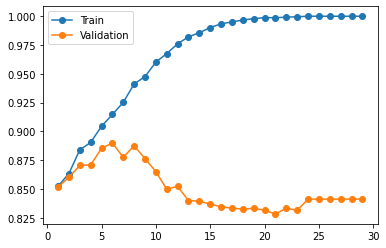

In [32]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df['max_depth'], df['train_score'], marker = 'o', label = 'Train')
plt.plot(df['max_depth'], df['validation_score'], marker = 'o', label = 'Validation')
plt.legend()

In [33]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

parameter_grid = {'max_depth': [6, 7, 8, 9], 
          'min_samples_split': range(2, 50, 5), 
          'criterion': ['gini', 'entropy'],
         'max_leaf_nodes': range(2, 50, 5)}

gridsearch = GridSearchCV(estimator=dt, 
                          param_grid=parameter_grid,scoring = f1_score, 
                          cv=5)

In [34]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=29, random_state=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8, 9],
                         'max_leaf_nodes': range(2, 50, 5),
                         'min_samples_split': range(2, 50, 5)},
             scoring=<function f1_score at 0x7f14250b4200>)

In [35]:
gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_leaf_nodes': 2,
 'min_samples_split': 2}

In [36]:
gridsearch.best_estimator_

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=2, random_state=10)

## Creating a decision tree instance with new hyperparameter values

In [37]:
# Creating the decision tree function
dt=gridsearch.best_estimator_

In [38]:
# Fitting the model
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=2, random_state=10)

In [39]:
# Predictions 
train_predict = dt.predict(X_train)
val_predict = dt.predict(X_valid)
test_predict = dt.predict(test_cleaned)

In [40]:
# Accuracy
acc_train=accuracy_score( y_train,train_predict)
acc_val=accuracy_score(y_valid,val_predict)
print('Training Accuracy: ', acc_train)
print('Validation Accuracy: ', acc_val)

Training Accuracy:  0.7910364145658263
Validation Accuracy:  0.7936241610738255


In [41]:
# F1 score
from sklearn.metrics import f1_score
print('f1 score: ', f1_score(y_valid, val_predict))

f1 score:  0.8519855595667871


In [42]:
TEST=pd.read_csv("test_hXY9mYw.csv")
TEST['Target'] = test_predict
TEST.head(10)

,Emp_ID,Target
0,394,0
1,173,0
2,1090,0
3,840,0
4,308,0
5,1864,0
6,1606,0
7,954,0
8,2422,0
9,1841,0


In [43]:
# Converting to csv format
TEST.to_csv('DanielTrial2jobathonnov2021.csv',index=False)